# comparing energy conservation of synchronous and asynchronous newmark trials

In [76]:
%matplotlib inline
from lib.my_initialization import *
from lib.controller.integrate_forward_dormand_prince_asynchronous import *
from lib.controller.integrate_forward_implicit_asynchronous import *
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
os.chdir(nb_dir)

In [80]:
os.chdir('../data/mov_csv')

In [81]:
# !ls

In [9]:
#syncrhonous newmark 100
fns = "avi_esynchronous_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv"
#syncrhonous newmark 400
# fns = "avi_esynchronous_fixed_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001"

In [10]:
#asynchronous newmark 100
fna = "avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv"

In [13]:
# df = pd.read_csv(fna)

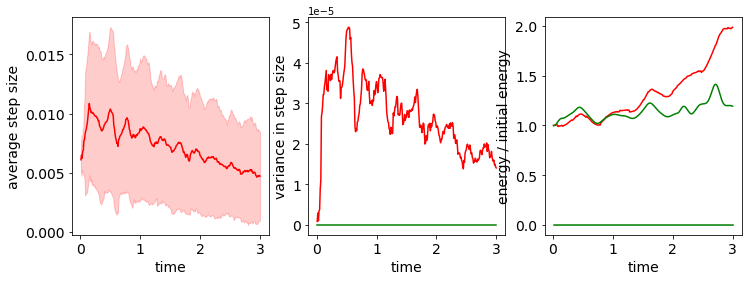

In [26]:
fig, axs = plt.subplots(figsize = (12,4), ncols = 3)

# fig, axs = plt.subplots(figsize = (4,4), ncols = 1)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}



ax = axs[0]
color_lst = ['red','green']
fn_lst = [fna,fns]
for color,fn in zip(color_lst,fn_lst):
    df = pd.read_csv(fn)
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_mean'])
    ax.plot(x_values, y_values, color=color)
    ax.fill_between(x_values, y_values-df['stepsize_std'],y_values+df['stepsize_std'], alpha=0.2, color=color)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('average step size',**axkwargs)
    # plt.xticks(**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[1]
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_std']**2)
    ax.plot(x_values, y_values, color=color)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('variance in step size',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[2]
    energy_lst = list(df['energy'].values)
    x_values = np.array(df['t'])
    y_values = np.array(energy_lst)/energy_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
    ax.plot(x_values, y_values, color=color)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('energy / initial energy',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

__Result__ it looks like energy is conserved better by synchronous explicit newmark integration, at least for these simplistic time adaptation rules.

# estimate the period and compare to c and mesh radius
__Result__ the two match up roughly.  Spheres aren't straight lines...

In [74]:
fna
fn_vscale_2 = "avi_es_fixed_lr_a_equal_b_spherical_mesh_100_mu_1.0_lambda_10.0_gamma_0.0_vscale_2.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv"
fns_400 = "avi_esynchronous_fixed_lr_a_equal_b_spherical_mesh_400_mu_1.0_lambda_10.0_gamma_0.0_vscale_1.0_stepsizeinit_0.0001_salience_2_atolx_0.0001.csv"

NameError: name 'fna' is not defined

NameError: name 'fna' is not defined

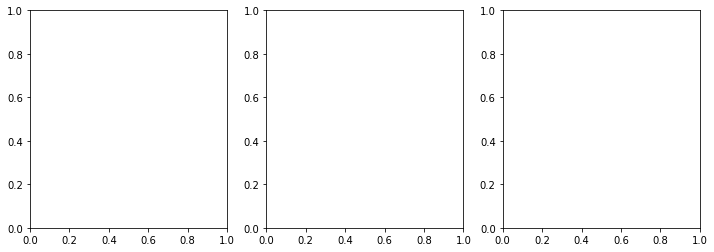

In [75]:
fig, axs = plt.subplots(figsize = (12,4), ncols = 3)

# fig, axs = plt.subplots(figsize = (4,4), ncols = 1)
bins = 30
axkwargs = {
    'fontsize':14,
    
}
hkwargs = {
    'color':'blue',#'orange',
    'cumulative':False,
    'stacked':True,
    'log':False,
    'density':False,
    'bins':bins
}

data_folder=nb_dir+"/../data/mov_csv"
os.chdir(data_folder)
ax = axs[0]
color_lst = ['red','green','blue', 'brown']
fn_lst = [fna,fns,fn_vscale_2, fns_400]
# fn_lst = [fns, fns_400]
for color,fn in zip(color_lst,fn_lst):
    df = pd.read_csv(fn)
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_mean'])
    ax.plot(x_values, y_values, color=color)
    ax.fill_between(x_values, y_values-df['stepsize_std'],y_values+df['stepsize_std'], alpha=0.2, color=color)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('average step size',**axkwargs)
    # plt.xticks(**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[1]
    x_values = np.array(df['t'])
    y_values = np.array(df['stepsize_std']**2)
    ax.plot(x_values, y_values, color=color)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('variance in step size',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

    ax = axs[2]
    energy_lst = list(df['volume'].values)
    x_values = np.array(df['t'])
    y_values = np.array(energy_lst)/energy_lst[0]#[s**2/m for s,m in zip(stepsize_std_lst,stepsize_mean_lst)])
    ax.plot(x_values, y_values, color=color)
    # ax.fill_between(x_values, y_values-stepsize_std_lst,y_values+stepsize_std_lst, alpha=0.2)
    ax.set_xlabel('time',**axkwargs)
    ax.set_ylabel('volume / initial volume',**axkwargs)
    ax.tick_params(labelsize=axkwargs['fontsize'])

In [58]:
num_cycles = 5.
duration = 3
period = duration / num_cycles
period

0.6

In [59]:
1/np.sqrt(3)

0.5773502691896258

In [60]:
c = np.sqrt(21)

In [61]:
diameter = 2
wavelength = 2*diameter

In [62]:
expected_fundamental_period = wavelength/c
expected_fundamental_period

0.8728715609439696

In [66]:
1/np.sqrt(4*np.pi)

0.28209479177387814

In [64]:
period/expected_fundamental_period

0.6873863542433759

In [67]:
1/np.sqrt(2)

0.7071067811865475

# bar chart of runtimes

In [1]:
#keep it simple, stupid!

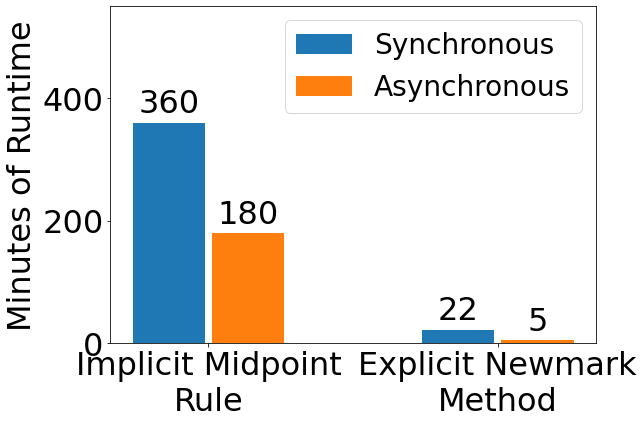

In [6]:
rt_synchA = 22 #minutes
rt_asynchA = 5 #minutes
save_fn = 'bar-chart-runtimes.png'

fig_folder  = nb_dir+'/../fig/'
os.chdir(fig_folder)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fontsize = 32

labels = ['Implicit Midpoint\nRule','Explicit Newmark\nMethod']
men_means = [int(4*60*3/2),22 ]
women_means = [ int(2*60*3/2),5]

x = np.arange(len(labels))  # the label locations
width = 0.25#.05  # the width of the bars

fig, ax = plt.subplots(figsize=(9,6))
rects1 = ax.bar(x - width*0.55, men_means, width, label='Synchronous')
rects2 = ax.bar(x + width*0.55, women_means, width, label='Asynchronous')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Minutes of Runtime',fontsize=fontsize)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)#,fontsize=fontsize)
ax.set_xticklabels(labels,fontsize=fontsize)
ax.legend(fontsize=fontsize-4)
ax.set_ylim([0,550])
# ax.set_xlabel('time',**axkwargs)
# ax.set_ylabel('variance in step size',**axkwargs)
ax.tick_params(labelsize=fontsize)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=fontsize)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig(save_fn)
# plt.show()

In [7]:
ch = rects2.get_children()

In [11]:
chh = ch[0].axes.get_children()

In [17]:
chh[-2].

''

In [4]:
#syncrhonous newmark
steps_per_unit_time = 1/0.0001
total_time = 3
run_time = 22
number_of_time_steps = steps_per_unit_time*total_time/run_time
number_of_time_steps

1363.6363636363637

In [25]:
#asyncrhonous newmark
steps_per_unit_time = 1/0.0005  #atol_v
total_time = 3
run_time = 5
number_of_time_steps = steps_per_unit_time*total_time/run_time
number_of_time_steps

1200.0

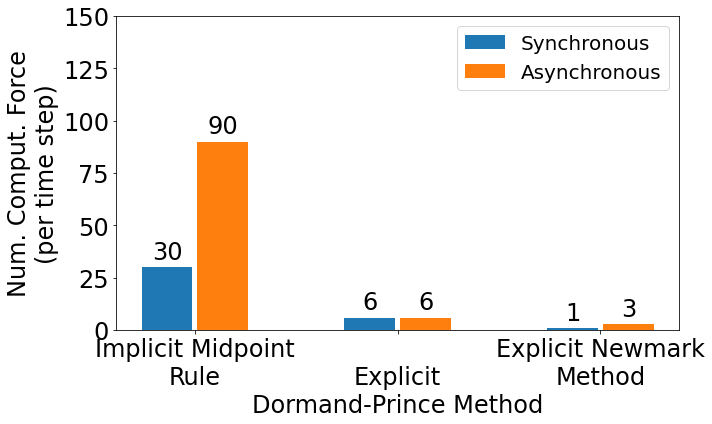

In [76]:
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
fontsize = 24

rt_synchA = 22 #minutes
rt_asynchA = 5 #minutes
save_fn = 'bar-chart-runtimes_all_3.png'

fig_folder  = nb_dir+'/../fig/'
os.chdir(fig_folder)

labels = ['Implicit Midpoint\nRule', '\nExplicit\nDormand-Prince Method','Explicit Newmark\nMethod']
men_means = [30,6,1]
women_means = [ 90,6,3]

x = np.arange(len(labels))  # the label locations
width = 0.25#.05  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width*0.55, men_means, width, label='Synchronous')
rects2 = ax.bar(x + width*0.55, women_means, width, label='Asynchronous')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Num. Comput. Force\n(per time step)',fontsize=fontsize)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)#,fontsize=fontsize)
ax.set_xticklabels(labels,fontsize=fontsize)
ax.legend(fontsize=fontsize-4)
ax.set_ylim([0,150])
# ax.set_xlabel('time',**axkwargs)
# ax.set_ylabel('variance in step size',**axkwargs)
ax.tick_params(labelsize=fontsize)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=fontsize)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig(save_fn)
plt.show()

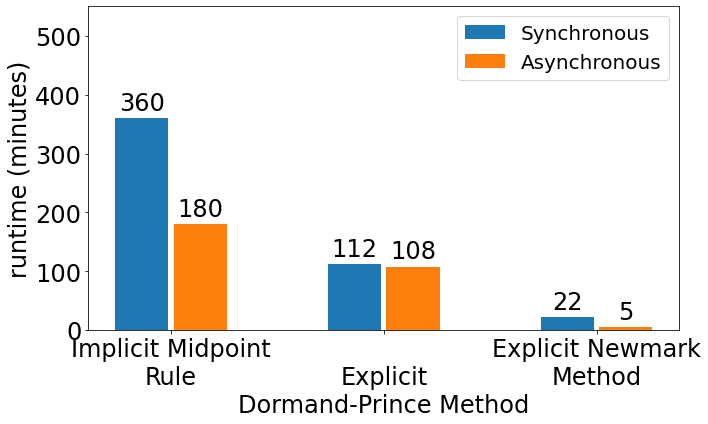

In [80]:
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
fontsize = 24

rt_synchA = 22 #minutes
rt_asynchA = 5 #minutes
save_fn = 'bar-chart-force_comps_all_3.png'

fig_folder  = nb_dir+'/../fig/'
os.chdir(fig_folder)

labels = ['Implicit Midpoint\nRule', '\nExplicit\nDormand-Prince Method','Explicit Newmark\nMethod']
men_means = [int(4*60*3/2),112,22]
women_means = [ int(2*60*3/2),108,5]


x = np.arange(len(labels))  # the label locations
width = 0.25#.05  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width*0.55, men_means, width, label='Synchronous')
rects2 = ax.bar(x + width*0.55, women_means, width, label='Asynchronous')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('runtime (minutes)',fontsize=fontsize)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)#,fontsize=fontsize)
ax.set_xticklabels(labels,fontsize=fontsize)
ax.legend(fontsize=fontsize-4)
ax.set_ylim([0,550])
# ax.set_xlabel('time',**axkwargs)
# ax.set_ylabel('variance in step size',**axkwargs)
ax.tick_params(labelsize=fontsize)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=fontsize)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig(save_fn)
plt.show()

# recalibrating atol for the asynchronous dormand prince method

In [41]:
#define Lamé parameters
mu = 1.; lam = 10.; 
#define coefficient for Rayleigh damping
gamma = .0#1.#1.;
#define adaptive time stepping absolute tolerances
salience = 2#128#32
learning_rate = np.log(salience) #np.log(16) #np.log(2)
lasso_fraction = 0.5#0.5
v_scale = 2.
mass_density=1.
stepsize_init = 0.0001#0.00001  #0.0001
atol_x = 0.0001#0.001#1e-7; 
atol_v = 0.0001#0.001#1e-7; 
btol_x = 0.00001#0.001#1e-10; 
btol_v = 0.00001#0.001#1e-10; 
#path to mesh
input_file_name = f'../data/spherical_meshes/spherical_mesh_64.stl'
#where to save results
data_folder =  os.path.join(nb_dir,'../data/mov_csv')


data_fn = f"dormand_prince_synch_fixed_lr_{os.path.basename(input_file_name).replace('.stl',f'_mu_{mu}_lambda_{lam}_gamma_{gamma}vscale_{v_scale}_stepsizeinit_{stepsize_init}')}_salience_{salience}_atolx_{atol_x}.csv"


# data_fn = f"avi_esynchronous_fixed_lr_a_equal_b_{os.path.basename(input_file_name).replace('.stl',f'_mu_{mu}_lambda_{lam}_gamma_{gamma}_vscale_{v_scale}_stepsizeinit_{stepsize_init}')}_salience_{salience}_atolx_{atol_x}.csv"
# data_fn = f"avi_ns_fixed_lr_a_equal_b_{os.path.basename(input_file_name).replace('.stl',f'_mu_{mu}_lambda_{lam}_gamma_{gamma}vscale_{v_scale}_stepsizeinit_{stepsize_init}')}_salience_{salience}_atolx_{atol_x}.csv"
# data_fn = f"dormand_prince_synch_fixed_lr_{os.path.basename(input_file_name).replace('.stl',f'_mu_{mu}_lambda_{lam}_gamma_{gamma}vscale_{v_scale}_stepsizeinit_{stepsize_init}')}_salience_{salience}_atolx_{atol_x}.csv"
save_folder_vid = '../vid/tmp'
folder_vid = '../vid'
# data_fn_counts = data_fn.replace("s_","s_counts_").replace('.csv','.npz')
data_fn_counts = data_fn.replace("s_","s_counts_").replace('.csv','.npy')
os.chdir(nb_dir)
# input_file_name = f'../data/spherical_meshes/spherical_mesh_64.stl'input_file_name = f'../data/spherical_meshes/spherical_mesh_64.stl'
# input_file_name = f'../data/spherical_meshes/spherical_mesh_1000.stl'
input_file_name = os.path.join(nb_dir,input_file_name)
tme = 0.
dict_values_system = initialize_system(input_file_name, time_initial=tme, mass_density=mass_density)
locals().update(dict_values_system)
N_elements = element_array_index.shape[0]
N_vertices = node_array_position.shape[0]
print(list(dict_values_system.keys()))
TEXT = f"""
TEXT=$'an inward squish
        Asynchronous Variational Integrator 
        Dormand–Prince Method
        
        Undamped Neohookean Model
        mu {mu}  lambda {lam} gamma {gamma}
        
        Spherical Mesh
        Num. Vertices {N_vertices}
        Num. Elements {N_elements}
'"""





#header to start of video
# TEXT = '''TEXT=$'Synchronous Variational Integrator\nDamped Neohookean Model\n(inward squish)''''
# TEXT = f"""
# TEXT=$'an inward squish
#         Synchronous Variational Integrator 
#         Explicit Newmark Method
        
#         Undamped Neohookean Model
#         mu {mu}  lambda {lam} gamma {gamma}
        
#         Spherical Mesh
#         Num. Vertices {N_vertices}
#         Num. Elements {N_elements}
# '"""

#write header to file
# print(TEXT)
# Dormand–Prince Method
# Explicit Newmark Method
# Implicit Midpoint Rule

face_normals all zero, ignoring!


['element_array_time', 'element_array_index', 'element_array_mass', 'element_array_volume', 'element_array_inverse_equilibrium_position', 'node_array_equilibrium_position', 'node_array_time', 'node_array_position', 'node_array_momentum', 'node_array_mass', 'node_array_volume']


In [34]:
# TODO: retry asyncrhonoous dormand prince with much lower atol  <-- 5*max(abs(typical or average  error))

In [42]:
one_step = get_one_step_explicit_dormand_prince_method(mu, lam, gamma)

In [51]:
# stepsize_next = h
# t_next = t + stepsize_next
# element_array_stepsize[K_index] = stepsize_next
#update the actual configuration with the results of the best stepcase
#update the elemental times
K_index =7
tau_of_K = element_array_time[K_index] #= t
Ka = element_array_index[K_index]
#update node's time
K_tau = node_array_time[Ka] #= t
#update node's position

vertices = node_array_position

In [64]:
#initialize stepsizes of simulation
element_array_stepsize = np.zeros_like(element_array_time) + stepsize_init
element_array_count_calls_one_step = np.zeros_like(element_array_time,dtype=int)
element_array_count_config_updates = np.zeros_like(element_array_time,dtype=int)
momentum = node_array_momentum.copy()
velocities = momentum.copy()
for j in range(N_vertices):
    velocities[j] /= node_array_mass[j]
v_scale=2
# #perturb momentum in the x direction and let it run overnight with a small timestep  
velocities[:,0] = -v_scale * vertices[:,0].copy()
x = node_array_position[Ka] #= K_vertices
v = velocities[Ka] #= K_velocities
K_masses = node_array_mass[Ka]
Bm = element_array_inverse_equilibrium_position[K_index]

In [65]:
v

array([[0.68498269, 0.        , 0.        ],
       [0.51487755, 0.        , 0.        ],
       [0.10982833, 0.        , 0.        ],
       [0.19787283, 0.        , 0.        ]])

In [66]:
h = 0.0001
retval = one_step(h, x, v, K_masses, K_tau, tau_of_K, Bm)

In [67]:
print(x)
# print(retval)

(7.021072376589554e-05, 1.3098189143232387e-07, array([[-0.34242285,  0.28780526,  0.52532406],
       [-0.25738729,  0.53399118,  0.32051728],
       [-0.05490318,  0.31091576,  0.62844662],
       [-0.09891663,  0.38469525,  0.32811406]]), array([[ 6.84982633e-01, -5.22255943e-08, -5.65895926e-09],
       [ 5.14877536e-01,  8.26962695e-08,  2.24703014e-08],
       [ 1.09828364e-01,  2.90628298e-08,  4.53993020e-08],
       [ 1.97872894e-01, -1.22636681e-07, -1.24744858e-07]]))


# So, we should be using a more precise tolerance, such as 1e-06 or 1e-05 or 1e-04

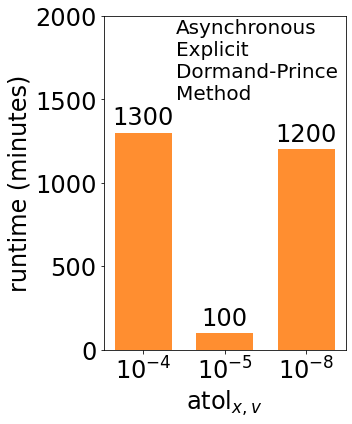

In [72]:
save_fn = 'bar-chart-atol-affects-dp.png'
fontsize = 24

rt_synchA = 22 #minutes
rt_asynchA = 5 #minutes

fig_folder  = nb_dir+'/../fig/'
os.chdir(fig_folder)

labels = [r'$10^{-4}$',r'$10^{-5}$',r'$10^{-8}$']
# men_means = [1241,1]
women_means = [1300,100,1200]


x = np.arange(len(labels))  # the label locations
width = 0.7#.05  # the width of the bars

fig, ax = plt.subplots(figsize=(5,6))
# rects1 = ax.bar(x - width*0.55, men_means, width, label='Synchronous')
rects2 = ax.bar(x  -width*0., women_means, width, 
#                 label='Asynchronous\nDormand-Prince\nMethod', 
                color="#FF8E30")##'#FF8825")##FF7400")#orange

ax.annotate(text='Asynchronous\nExplicit\nDormand-Prince\nMethod',xy=(0.4,1500),fontsize=fontsize-4)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('runtime (minutes)',fontsize=fontsize)
# ax.set_title('runtimes significantly effected by atol', fontsize=fontsize)
ax.set_xticks(x)#,fontsize=fontsize)
ax.set_xticklabels(labels,fontsize=fontsize)
# ax.legend(fontsize=fontsize-4)
ax.set_ylim([0,2000])
ax.set_xlabel(r'atol$_{x,v}$', fontsize=fontsize)
# ax.set_ylabel('variance in step size',**axkwargs)
ax.tick_params(labelsize=fontsize)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=fontsize)


# autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig(save_fn)
plt.show()

In [70]:
# eval(
b"#FF8E30".fromhex("1234")
#b"#FF8E30".to_hex("1234")

b'\x124'

In [58]:
eval(input("Enter a pythonic math expression: "))

Enter a pythonic math expression: 100%7


2

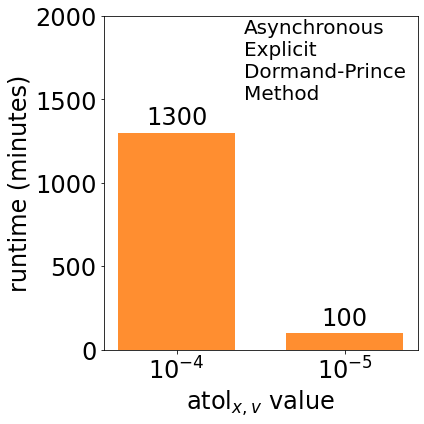

In [85]:
save_fn = 'bar-chart-atol-affects-dp.png'
fontsize = 24
rt_synchA = 22 #minutes
rt_asynchA = 5 #minutes

fig_folder  = nb_dir+'/../fig/'
os.chdir(fig_folder)

labels = [r'$10^{-4}$',r'$10^{-5}$']
# men_means = [1241,1]
women_means = [1300,100]


x = np.arange(len(labels))  # the label locations
width = 0.7#.05  # the width of the bars

fig, ax = plt.subplots(figsize=(6,6))
# rects1 = ax.bar(x - width*0.55, men_means, width, label='Synchronous')
rects2 = ax.bar(x  -width*0., women_means, width, 
#                 label='Asynchronous\nDormand-Prince\nMethod', 
                color="#FF8E30")##'#FF8825")##FF7400")#orange

ax.annotate(text='Asynchronous\nExplicit\nDormand-Prince\nMethod',xy=(0.4,1500),fontsize=fontsize-4)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('runtime (minutes)',fontsize=fontsize)
# ax.set_title('runtimes significantly effected by atol', fontsize=fontsize)
ax.set_xticks(x)#,fontsize=fontsize)
ax.set_xticklabels(labels,fontsize=fontsize)
# ax.legend(fontsize=fontsize-4)
ax.set_ylim([0,2000])
ax.set_xlabel(r'atol$_{x,v}$ value', fontsize=fontsize)
# ax.set_ylabel('variance in step size',**axkwargs)
ax.tick_params(labelsize=fontsize)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=fontsize)


# autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig(save_fn)
plt.show()